# Import libraries

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Read the dataset, investigate dimension and null values

In [230]:
df = pd.read_csv("C:/Users/conne/Python Scripts/Dataset/Data_Visualization_with_Matplotlib/bigmart_data.csv")
print(df.shape)
print(df.isna().sum())

(8523, 12)
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


The null values in Item_Weight and Outlet_Size cannot be imputed, better to drop the NA values

In [11]:
#df.dropna(inplace= True)
#print(df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# What is the average sales of the outlets from 1987 to 2009?

In [45]:
sales_by_yr_df = pd.DataFrame(df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean())

sales_by_yr_df

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,2483.677474
1987,2298.995256
1997,2277.844267
1998,339.351662
1999,2348.354635
2002,2192.384798
2004,2438.841866
2007,2340.675263
2009,1995.498739


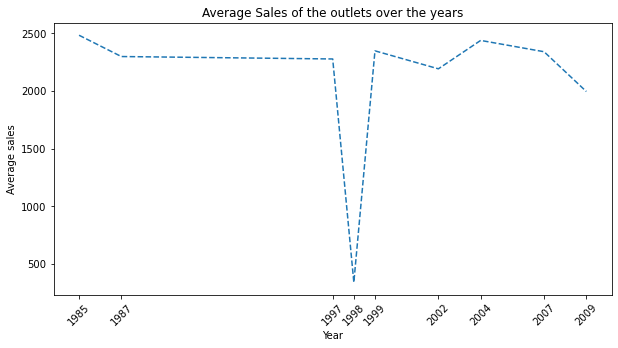

In [77]:
x_values = list(sales_by_yr_df.index)
y_values = list(sales_by_yr_df.Item_Outlet_Sales)


fig = plt.figure(figsize=(10,5))

plt.plot(x_values, y_values,'--')
plt.xticks(x_values,x_values,rotation='vertical')
plt.xlabel("Year")
plt.ylabel("Average sales")
plt.title("Average Sales of the outlets over the years")
plt.show()


Observation:
- 1998 has been the year with the least sales made. 
- The sales information for most of the years are missing in the dataset. It is interesting to notice that after the dip in the year 1998, the sales average has been steady up until 2007.

# How does the number of outlet impact the sales every year?

In [78]:
outlet_yr_df = pd.DataFrame(df.groupby('Outlet_Establishment_Year')['Outlet_Identifier'].count())

outlet_yr_df

,Outlet_Identifier
Outlet_Establishment_Year,
1985,1463
1987,932
1997,930
1998,555
1999,930
2002,929
2004,930
2007,926
2009,928


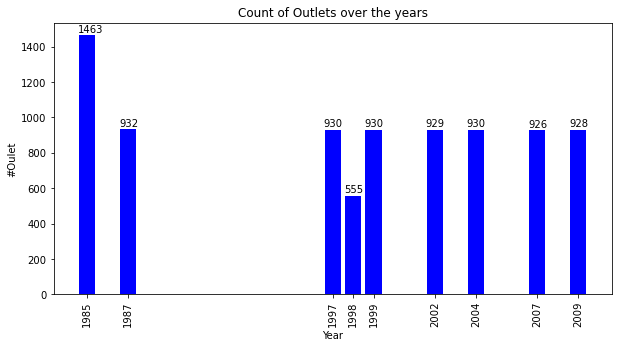

In [126]:
x_values = list(outlet_yr_df.index)
y_values = list(outlet_yr_df.Outlet_Identifier)


fig = plt.figure(figsize=(10,5))

plt.bar(x_values, y_values, color='blue')
plt.xticks(x,x,rotation='vertical')
plt.xlabel("Year")
plt.ylabel("#Oulet")
plt.title("Count of Outlets over the years")
xlocs = [i for i in x]
for i, v in enumerate(y_values):
    plt.text(xlocs[i] - 0.45, v + 20, str(v))
plt.show()

Observation:
    - It is clear that the sales in the year 1998 was low because of the number of outlets running were almost of that compared       to other years.
    - It is pretty clear that the average sales and the outlet count has a positive correlation with each other.

# What are the outlet sizes available over the years?

In [156]:
df.dropna(inplace=True) # Most of the values for Outlet_Size were missing

In [162]:
outlet_yr_df = df.groupby(['Outlet_Establishment_Year','Outlet_Size'])
outlet_yr_df.size().unstack().fillna(0)

Outlet_Size,High,Medium,Small
Outlet_Establishment_Year,,,
1987,932.0,0.0,0.0
1997,0.0,0.0,930.0
1999,0.0,930.0,0.0
2004,0.0,0.0,930.0
2009,0.0,928.0,0.0


Information about the Outlet_Size for most of the years were missing and with the available data it is seen that no more than one type of Outlet_Size was available in a single year


# Do the Location_Type and the Outlet_Size have any relation?

In [176]:
loc_outlet_df = df.groupby(['Outlet_Location_Type','Outlet_Size'])
loc_outlet_df = loc_outlet_df.size().unstack().fillna(0)
loc_outlet_df

Outlet_Size,High,Medium,Small
Outlet_Location_Type,,,
Tier 1,0.0,930.0,930.0
Tier 2,0.0,0.0,930.0
Tier 3,932.0,928.0,0.0


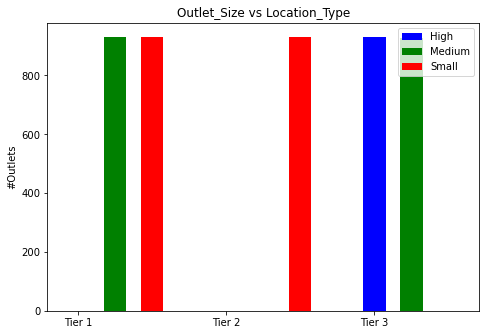

In [227]:
x_label  = list(loc_outlet_df.index)
X = np.arange(len(x_label))
y_label = list(loc_outlet_df.columns)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xticks(X)
ax.set_xticklabels(x_label)
ax.set_ylabel('#Outlets')
ax.set_title('Outlet_Size vs Location_Type')

ax.bar(X+0.00, loc_outlet_df.iloc[:,0], color = 'b', width = 0.15)
ax.bar(X+0.25, loc_outlet_df.iloc[:,1], color = 'g', width = 0.15)
ax.bar(X+0.50, loc_outlet_df.iloc[:,2], color = 'r', width = 0.15)

ax.legend(labels=y_label)              

There is no much relation between the Location_Type and Outlet_Size.
We would pre assume that Tier 1 location will have Outlet_Size of High category, but that is not what the data says.
Although the number of stores remain fairly same across the varied outlet size.

# Do the Outlet_Type vary based on the Outlet_Location_Type?

In [231]:
loc_type_df = df.groupby(['Outlet_Location_Type','Outlet_Type'])
loc_type_df = loc_type_df.size().unstack().fillna(0)
loc_type_df

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,,,,
Tier 1,528.0,1860.0,0.0,0.0
Tier 2,0.0,2785.0,0.0,0.0
Tier 3,555.0,932.0,928.0,935.0


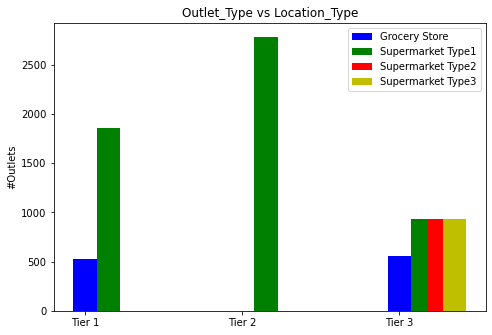

In [235]:
x_label  = list(loc_type_df.index)
X = np.arange(len(x_label))
y_label = list(loc_type_df.columns)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.set_xticks(X)
ax.set_xticklabels(x_label)
ax.set_ylabel('#Outlets')
ax.set_title('Outlet_Type vs Location_Type')

ax.bar(X+0.00, loc_type_df.iloc[:,0], color = 'b', width = 0.15)
ax.bar(X+0.15, loc_type_df.iloc[:,1], color = 'g', width = 0.15)
ax.bar(X+0.25, loc_type_df.iloc[:,2], color = 'r', width = 0.15)
ax.bar(X+0.35, loc_type_df.iloc[:,3], color = 'y', width = 0.15)


ax.legend(labels=y_label)  

It is very inetresting to see that the Tier 3 locations have access to all type of outlets. All of the different types of outlets are present in equal amount.
Tier 2 has only one type of outlet but it is present in large number

# Inspecting the fat content in the items available in the outlets

In [236]:
df.Item_Fat_Content.value_counts()


Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [237]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','low fat'],'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'],'Regular')

In [238]:
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [248]:
fat_item_df = df.groupby(['Item_Fat_Content','Item_Type'])
fat_item_df = fat_item_df.size().unstack().fillna(0)
fat_item_df.drop(columns=['Health and Hygiene','Household','Others'],inplace=True)

fat_item_df


Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Meat,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Item_Fat_Content,,,,,,,,,,,,,
Low Fat,329.0,140.0,41.0,341.0,418.0,450.0,630.0,214.0,170.0,37.0,692.0,374.0,82.0
Regular,319.0,111.0,69.0,308.0,264.0,406.0,602.0,0.0,255.0,27.0,508.0,71.0,66.0


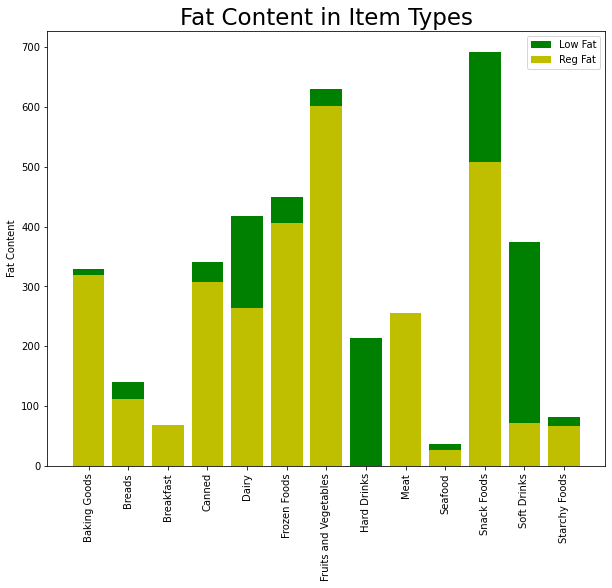

In [252]:
labels = list(fat_item_df.columns)
low_fat = list(fat_item_df.iloc[0,:])
reg_fat = list(fat_item_df.iloc[1,:])
width = 0.35

fig,ax = plt.subplots(figsize=(10,8))
#ax.set_xticks(X)
ax.set_xticklabels(labels,rotation=90)
ax.bar(labels,low_fat,label='Low Fat',color='g')
ax.bar(labels,reg_fat,label='Reg Fat',color='y')

ax.set_ylabel('Fat Content')
ax.set_title('Fat Content in Item Types',size=23)
ax.legend()

plt.show()

In [260]:

item_sales_df = df.groupby(['Outlet_Establishment_Year','Item_Type'])
item_sales_df = item_sales_df.size().unstack().fillna(0)
item_sales_df

Item_Type,Baking Goods,Breads,Breakfast,Canned,Dairy,Frozen Foods,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
Outlet_Establishment_Year,,,,,,,,,,,,,,,,
1985,112,47,21,110,116,138,213,31,90,151,88,32,13,212,71,18
1987,73,25,13,65,80,92,142,23,61,103,41,16,5,125,49,19
1997,76,26,10,72,78,108,126,20,56,103,44,22,6,120,48,15
1998,42,17,9,35,43,54,79,16,37,67,34,10,4,71,28,9
1999,66,25,13,67,78,93,138,30,52,95,47,17,7,139,46,17
2002,70,33,10,74,69,81,143,28,55,99,38,20,9,133,51,16
2004,68,29,10,79,71,92,129,22,50,102,43,16,8,140,52,19
2007,73,22,12,69,74,106,127,22,61,95,44,16,5,128,54,18
2009,68,27,12,78,73,92,135,22,58,95,46,20,7,132,46,17


In [264]:
l1 = item_sales_df.iloc[:,0]
l2 = item_sales_df.iloc[:,1]

In [275]:
column = list(item_sales_df.columns)
columns = np.arange(len(item_sales_df.columns))
collection=[]
for i in columns:
    #i = list(item_sales_df.iloc[:,i])
    collection.append(list(item_sales_df.iloc[:,i]))
    
collection

[[112, 73, 76, 42, 66, 70, 68, 73, 68],
 [47, 25, 26, 17, 25, 33, 29, 22, 27],
 [21, 13, 10, 9, 13, 10, 10, 12, 12],
 [110, 65, 72, 35, 67, 74, 79, 69, 78],
 [116, 80, 78, 43, 78, 69, 71, 74, 73],
 [138, 92, 108, 54, 93, 81, 92, 106, 92],
 [213, 142, 126, 79, 138, 143, 129, 127, 135],
 [31, 23, 20, 16, 30, 28, 22, 22, 22],
 [90, 61, 56, 37, 52, 55, 50, 61, 58],
 [151, 103, 103, 67, 95, 99, 102, 95, 95],
 [88, 41, 44, 34, 47, 38, 43, 44, 46],
 [32, 16, 22, 10, 17, 20, 16, 16, 20],
 [13, 5, 6, 4, 7, 9, 8, 5, 7],
 [212, 125, 120, 71, 139, 133, 140, 128, 132],
 [71, 49, 48, 28, 46, 51, 52, 54, 46],
 [18, 19, 15, 9, 17, 16, 19, 18, 17]]

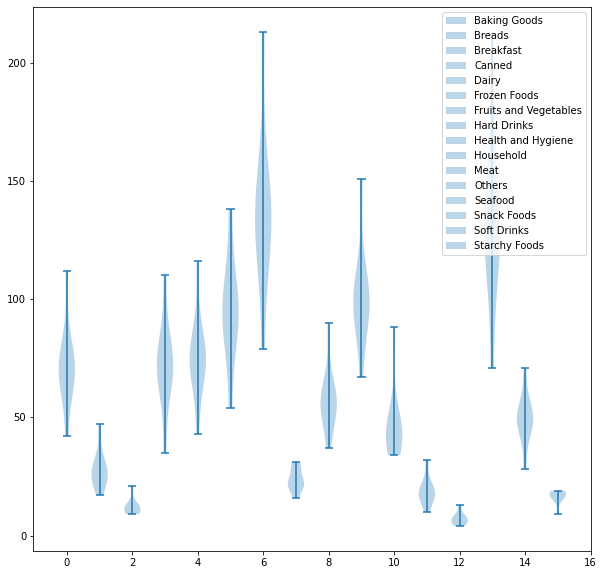

In [277]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
violinplot = ax.violinplot(collection,columns)
ax.legend(column)
plt.show()